# Trabalho: Proposta de Mineração de Dados

**Nome dos Participantes:**

Luan Carlos Martins dos Santos, 23022464

Luciano Augusto Campagnoli da Silva, 23022469

Mateus Fonseca Piris, 23022390

**Intruções iniciais**

UTILIZANDO OS DADOS DISPONIBILIZADOS NO ARQUIVO (DATASET: SINAISVITAIS003 100DIAS DV2 XXXX.TXT , ONDE xxxx INDICA O PRIMEIRO DÍGITO DO SEU RA – DA DIREITA PARA A ESQUERDA), APRESENTE UMA PROPOSTA DE MINERAÇÃO DE DADOS UTILIZANDO OS ELEMENTOS DE ESTATÍSTICAS DESENVOLVIDOS EM CLASSE.

UMA DAS PRIMEIRAS ETAPAS DA MINERAÇÃO DE DADOS É A PREPARAÇÃO DA BASE DE DADOS. OBSERVE NOS GRÁFICOS ABAIXO QUE OS DADOS POSSUEM ALGUMAS ANOMALIAS OU VALORES ESPÚRIOS OU RUÍDOS, QUE DEVEM SER REMOVIDAS. OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL SÃO OS SEGUINTES:

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

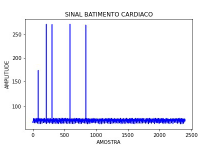 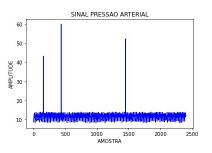 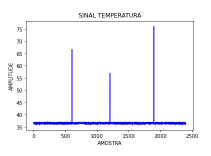

**Início da solução do problema.**

In [15]:
# Importação das Bibliotecas
from os import sep, path, getcwd
import csv
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Definição de constantes

In [16]:
media_literal: str = "Média"
mediana_literal: str = "Mediana"
moda_literal: str = "Moda"
desvio_padrao_literal: str = "Desvio Padrão"
primeiro_quartil_literal: str = "Primeiro Quartil"
terceiro_quartil_literal: str = "Terceiro Quartil"
minimo_literal: str = "Mínimo"
maximo_literal: str = "Maximo"
batimento_literal: str = "BATIMENTO"
temperatura_literal: str = "TEMPERATURA"
pressao_literal: str = "PRESSAO"
batimento_cardiaco_literal: str = "Batimento Cardíaco"
pressao_arterial_literal: str = "Pressão Arterial"
temperatura_corporal_literal: str = "Temperatura Corporal"
hora_literal: str = "HORA"
classificacao_literal: str = "Classificacao"
valor_literal: str = "Valor"
pacote_batimento_literal: str = "heartbeat_pack"
proximo_pacote_batimento_literal: str = "next_heartbeat_pack"
pacote_pressao_literal: str = "blood_pressure_pack"
proximo_pacote_pressao_literal: str = "next_blood_pressure_pack"
pacote_temperatura_literal: str = "temperature_pack"
proximo_pacote_temperatura_literal: str = "next_temperature_pack"

Função para calcular média entre dois valores (a ser usada na substituição de dados espúrios)

In [17]:
def media(num1: float, num2: float) -> float:
    return (num1 + num2)/2

**1)** DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR. DESENVOLVER O SOFTWARE EM PYTHON.

**Comentário:** O arquivo com a base de dados escolhido foi o "sinaisvitais003 100dias DV2 RAxxx4".

In [18]:
# ============================= LEITURA DOS DADOS =============================
dados = []

path = getcwd()+sep+"sinaisvitais003 100dias DV2 RAxxx4.txt"

with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd = list(d)
    for i in range(0,len(dd)):
        p = dd[i][0]  
        palavras = p.split("\t")
        dados.append({"HORA":palavras[0],batimento_literal:palavras[1],
                      pressao_literal:palavras[2],temperatura_literal:palavras[3]})

# Criar o DataFrame Inicial (Utilizado no Apêndice deste trabalho)
df0 = pd.DataFrame(data = dados, dtype=float)

# Criar o DataFrame Final
df = pd.DataFrame(data = dados, dtype=float)

**Preparação dos Dados:** o script a seguir tem a finalidade de eliminar os valores fora dos intervalos abaixo (intervalo padrão dos sinais vitais). 

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [19]:
# Substituir o valor espúrio pela média entre o valor anterior e posterior
for j in range(len(dd)):
    if (df[batimento_literal][j] > 100) | (df[batimento_literal][j] < 0):
        df[batimento_literal].replace(
            df[batimento_literal][j], 
            media(
                df[batimento_literal][j - 1],
                df[batimento_literal][j + 1]
            ), 
            inplace=True
        )

    if (df[pressao_literal][j] > 20) | (df[pressao_literal][j] < 0):
        df[pressao_literal].replace(
            df[pressao_literal][j], 
            media(
                df[pressao_literal][j - 1],
                df[pressao_literal][j + 1]
            ), 
            inplace=True
        )

    if (df[temperatura_literal][j] > 40) | (df[temperatura_literal][j] < 0):
        df[temperatura_literal].replace(
            df[temperatura_literal][j], 
            media(
                df[temperatura_literal][j - 1],
                df[temperatura_literal][j + 1]
            ), 
            inplace=True
        )

**Plotagem dos sinais vitais após o tratamento dos dados.**

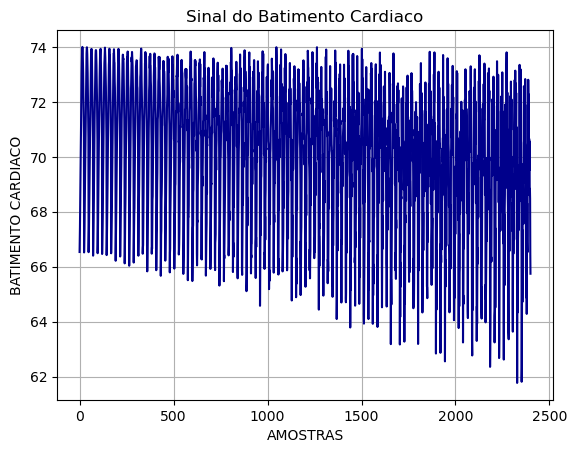

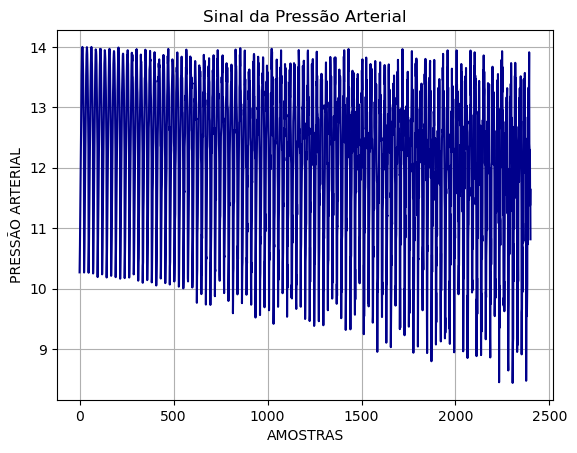

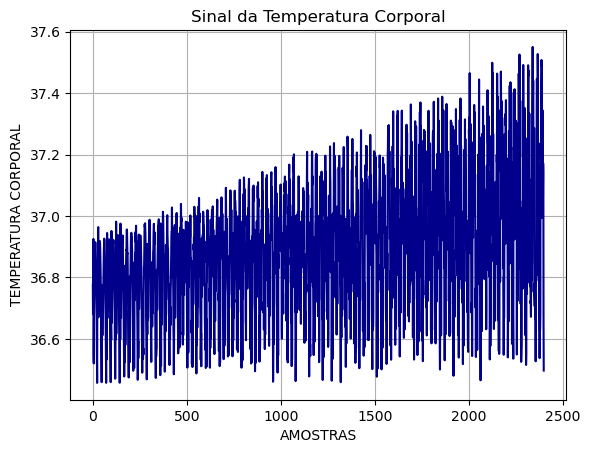

In [20]:
# Plotar o sinal do batimento cardíaco
plt.plot(df[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

Os sinais vitais e os histogramas dos dados antes do tratamento também podem ser observados no Apêndice deste trabalho.

Por fim, convém conferir se a base de dados após o tratamento, possui algum valor faltante, ou fora do intervalo abaixo. Portanto, o script a seguir realiza esta verificação.

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [21]:
# Verificar se há valores faltantes
print("\nQuantidade de valores faltantes:")
print(df.isnull().sum())

# Valores fora da faixa de análise padrão
valores_fora = pd.DataFrame()
# Contar valores fora da faixa, e inserir em um DataFrame
valores_fora[''] = [batimento_literal, pressao_literal, temperatura_literal]
valores_fora['Valores abaixo da faixa'] = [sum(i <= 0 for i in df[batimento_literal]),
                                           sum(i <= 0 for i in df[pressao_literal]),
                                           sum(i <= 0 for i in df[temperatura_literal])]

valores_fora['Valores acima da faixa'] = [sum(i >= 100 for i in df[batimento_literal]),
                                          sum(i >= 20 for i in df[pressao_literal]),
                                          sum(i >= 40 for i in df[temperatura_literal])] 

valores_fora['Total'] = valores_fora['Valores abaixo da faixa'] + valores_fora['Valores acima da faixa']
                                     
print("\nQuantidade de valores fora da faixa:")
print(valores_fora.to_string(index = False))



Quantidade de valores faltantes:
HORA           0
BATIMENTO      0
PRESSAO        0
TEMPERATURA    0
dtype: int64

Quantidade de valores fora da faixa:
             Valores abaixo da faixa  Valores acima da faixa  Total
  BATIMENTO                        0                       0      0
    PRESSAO                        0                       0      0
TEMPERATURA                        0                       0      0


**Conclusão:** Conforme o esperado, após a preparação dos dados, a base de dados escolhida para este trabalho não possui valores faltante e, passou não ter valores fora do intervalo padrão.

**2)** CONSIDERANDO-SE QUE O PACOTE PADRÃO DE DADOS CONTÉM 24 AMOSTRAS COLETADAS A CADA HORA, APLIQUE A CORRELAÇÃO, PARA CADA UM DOS PARÂMETROS (O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL), PROCURE IDENTIFICAR PADRÕES DE COMPORTAMENTOS NOS VALORES AMOSTRADOS. ATENÇÃO, É PRECISO SEGMENTAR O ARQUIVO EM PACOTES MENORES COM 24 AMOSTRA CADA, OU SEJA, DIVIDA O ARQUIVO EM PACOTES COM 24 AMOSTRA CADA E APLIQUE AS FERRAMENTAS ESTATÍSTICAS. DESENVOLVER O SOFTWARE EM PYTHON.

Antes de implementar os scripts da solução deste problema, realizou-se a pesquisa a seguir para ajudar na interpretação do coeficiênte de Pearson.

**Pesquisa:**

De acordo com as notas de aula da professora de Estatística da UFPR, Silvia Shimakura, a tabela a seguir serve como uma boa guia para interpretar o coeficiente de correlação de Pearson.

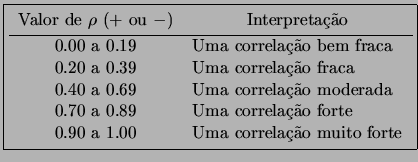

Nesse sentido, normalizamos o gráfico anterior para vincular com as informações da tabela, e ficou da seguinte forma:

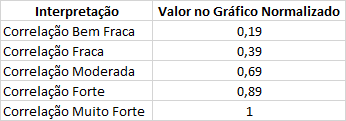

**Referência:** Notas de Aula. Professora Silvia Shimakura. Disponível em: http://leg.ufpr.br/~silvia/CE003/node74.html. Acesso em: 15 de Abril de 2023;

Na sequência, implementou-se as informações da pesquisa para aplicar no problema.

In [22]:
def classificador_correlacao(corr: float, index: int, corr_df: pd.DataFrame) -> None:
    if (corr >= 0.9):
        corr_df["Classificacao"][index] = "Muito Forte"
        corr_df["Valor"][index] = 1
    
    elif (corr >= 0.7 and corr < 0.9):
        corr_df["Classificacao"][index] = "Forte"
        corr_df["Valor"][index] = 0.89
        
    elif (corr >= 0.4 and corr < 0.7):
        corr_df["Classificacao"][index] = "Moderada"
        corr_df["Valor"][index] = 0.69
        
    elif (corr >= 0.2 and corr < 0.4):
        corr_df["Classificacao"][index] = "Fraca"
        corr_df["Valor"][index] = 0.39
        
    elif (corr >= 0 and corr < 0.2):
        corr_df["Classificacao"][index] = "Bem Fraca"
        corr_df["Valor"][index] = 0.19

Em seguida, finalmente, implementou-se o script para segmentar o "dataset" em pacotes com 24 amostras. Nesse sentido, o próximo passo foi calcular, para um mesmo sinal, a correlação de um determinado pacote com seu posterior. Com isso, foi possível verificar, por exemplo, se o sinal do dia primeiro foi semelhante ao do segundo dia, se este foi parecido com o sinal do terceiro dia etc.

Desse modo, conseguimos verificar se os sinais vitais possui um padrão comportamental "dia após dia". Confira!

    Correlação do Batimento  Correlação da Pressão  Correlação da Temperatura
0                  0.999979               0.999986                   0.555411
1                  0.999901               0.999949                   0.806074
2                  0.999685               0.999828                   0.849171
3                  0.999671               0.999644                   0.800138
4                  0.999390               0.999690                   0.800802
..                      ...                    ...                        ...
94                 0.757699               0.780387                   0.673057
95                 0.665690               0.913950                   0.463700
96                 0.729542               0.866810                   0.612798
97                 0.851996               0.783753                   0.756383
98                 0.699210               0.847218                   0.751642

[99 rows x 3 columns]


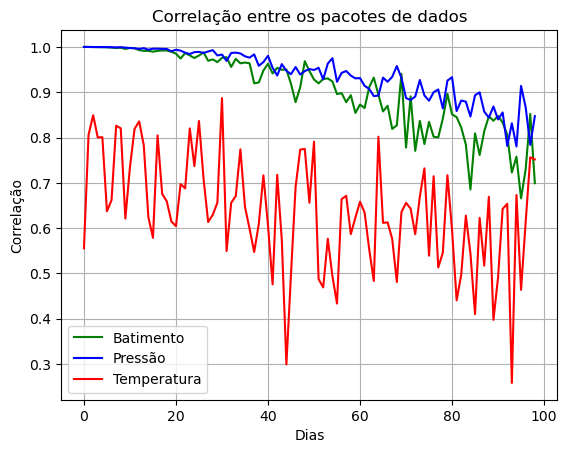

In [23]:
n: int = 0

corr_batimento: list[float] = []
corr_pressao: list[float] = []
corr_temperatura: list[float] = []

int_corr_batimento = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))
int_corr_pressao = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))
int_corr_temperatura = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))
 
df_correlacao = pd.DataFrame()
correlation_matrix_df = pd.DataFrame()

# Segmentação do Dataset em pacotes com 24 amostras
for k in range(0,2376,24):
    
    # Cálculo da correlação de cada pacote de dados
    correlation_matrix_df[pacote_batimento_literal] = np.array(df[batimento_literal][k:k+24])
    correlation_matrix_df[proximo_pacote_batimento_literal] = np.array(df[batimento_literal][k+24:k+48])
    correlation_matrix_df[pacote_pressao_literal] = np.array(df[pressao_literal][k:k+24])
    correlation_matrix_df[proximo_pacote_pressao_literal] = np.array(df[pressao_literal][k+24:k+48])
    correlation_matrix_df[pacote_temperatura_literal] = np.array(df[temperatura_literal][k:k+24])
    correlation_matrix_df[proximo_pacote_temperatura_literal] = np.array(df[temperatura_literal][k+24:k+48])
    
    # Vetor com a correlação entre os pacotes de dados do Batimento Cardíaco
    corr_batimento.append(correlation_matrix_df.corr(method ='pearson')[pacote_batimento_literal][proximo_pacote_batimento_literal])
    # Vetor com a correlação entre os pacotes de dados da Pressão Arterial
    corr_pressao.append(correlation_matrix_df.corr(method ='pearson')[pacote_pressao_literal][proximo_pacote_pressao_literal])
    # Vetor com a correlação entre os pacotes de dados da Temperatura Corporal
    corr_temperatura.append(correlation_matrix_df.corr(method ='pearson')[pacote_temperatura_literal][proximo_pacote_temperatura_literal])  

    classificador_correlacao(corr = corr_batimento[-1], index = n, corr_df = int_corr_batimento)
    classificador_correlacao(corr = corr_pressao[-1], index = n, corr_df = int_corr_pressao)
    classificador_correlacao(corr = corr_temperatura[-1], index = n, corr_df = int_corr_temperatura)
    
    n = n + 1
    
df_correlacao['Correlação do Batimento'] = corr_batimento
df_correlacao['Correlação da Pressão'] = corr_pressao
df_correlacao['Correlação da Temperatura'] = corr_temperatura

print(df_correlacao)

# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os pacotes de dados")
plt.plot(corr_batimento, color = 'g', label = 'Batimento')
plt.plot(corr_pressao, color = 'b', label = 'Pressão')
plt.plot(corr_temperatura, color = 'r', label = 'Temperatura')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

Posteriormente, para interpretar a correlação dos sinais, de acordo com a pesquisa realizada, plotou-se o gráfico da correlação normalizada. Observe!

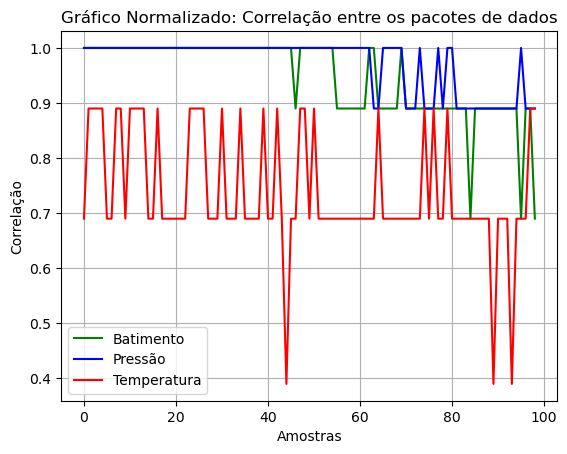

In [24]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Gráfico Normalizado: Correlação entre os pacotes de dados")
plt.plot(int_corr_batimento['Valor'], color = 'g', label = 'Batimento')
plt.plot(int_corr_pressao['Valor'], color = 'b', label = 'Pressão')
plt.plot(int_corr_temperatura['Valor'], color = 'r', label = 'Temperatura')
plt.xlabel("Amostras")
plt.ylabel("Correlação")
plt.legend()

**Conclusão:**

É possível indentificar os seguintes padrões de comportamentos:

- **Batimento**: Entre os dias 1 e 47, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte". Entretanto, há três momentos que a correlação foi considerada "Moderada", porém, mesmo com estas oscilações, é possível considerar que o batimento cardíaco possui um comportamento padrão.
- **Pressão**: Entre os dias 1 e 64, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte" e, isso leva crer que o comprtamento dos dados começou a sofrer alterações, mas, ainda assim, a variável continua tendo um comportamento padrão.
- **Temperatura**: Dos três sinais vitais, a temperatura é a menos padronizada, pois a correlação está, predominantemente, classificada entre "Forte" e "Moderada", e em três momentos foi considerada "Fraca". Entretanto, pode-se dizer que há um padrão comportamental, haja vista que a temperatura variou muito pouco entre os 100 dias, ou seja, a menor temperatura média de um determinado dia foi de 36.75 °C e a maior foi de 37.05 °C, isto é, 0.3 °C de diferença.

**3)** A CORRELAÇÃO PODE SER APLICADA INDIVIDUALMENTE PARA CADA UM DOS PARÂMETROS APRESENTADOS, CONTUDO, VOCÊ PODE APLICAR A CORRELAÇÃO EM DOIS PARÂMETROS SIMULTANEAMENTE PARA A IDENTIFICAÇÃO DE PADRÕES ? POR EXEMPLO, DADO UM PERÍODO DE TEMPO, RESPEITANDO O TAMANHO DO PACOTE DE DADOS E A AMOSTRAGEM, PODE-SE UTILIZAR OS VALORES DE CORRELAÇÃO ENTRE BATIMENTOS CARDÍACOS E PRESSÃO ARTERIAL PARA COMPOR UM NOVO PADRÃO DE APRENDIZADO? AVALIE ESTA QUESTÃO - APRESENTE UMA SOLUÇÃO/RESOLUÇÃO. DESENVOLVER O SOFTWARE EM PYTHON.

Primeiramente, a fim de conhecer um pouco mais sobre a abordagem deste estudo, realizou-se a seguinte pesquisa.

**Pesquisa:**

- **Correlação entre Pressão Arterial e Batimento Cardíaco:** Segundo o website do Instituto do Coração de Passo Fundo, "A pressão arterial é a pressão exercida pelo sangue dentro dos vasos sanguíneos, com a força proveniente dos batimentos cardíacos, para fazer com que o mesmo consiga circular por todo o corpo" [1]. Para complementar, no website da clínica Unicardio, há a seguinte informação: "A pressão alta sobrecarrega o coração, que precisa trabalhar mais para que o sangue chegue aos outros órgãos e tecidos do corpo quando a pressão está mais alta que o normal. Por este motivo, surgem as palpitações e as arritmias cardíacas, pois o coração entra em descompasso" [2].

- **Correlação entre Batimento Cardíaco e Temperatura Corporal:** Sobre a relação entre Batimento Cardíaco e Temperatura Corporal, convém citar a informação encontrada no website da Associação Beneficiente Síria: "As altas temperaturas aumentam a espessura do sangue, fazendo subir a pressão e a frequência cardíaca, elevando, assim, o risco de sofrer um infarto ou um derrame" [3]. 

- **Correlação entre Temperatura Corporal e Pressão Arterial:** Sobre a relação entre Temperatura Corporal e Pressão Arterial, vale a pena mencionar o dado encontrado no website do laboratório farmacêutico "Cuidados pela Vida": "Segundo Dr. Francisco, o frio provoca a vasoconstrição e o aumento da resistência vascular, o que resulta na elevação da pressão arterial. Já o calor produz o efeito oposto: causa vasodilatação, diminuindo a resistência dos vasos sanguíneos e reduzindo a pressão em relação a dias de maior frio" [4].

**Referências:**

[1] Os novos limites para a pressão arterial. Instituto do Coração de Passo Fundo. Disponível em: https://icor.med.br/os-novos-limites-para-a-pressao-arterial/#:~:text=A%20press%C3%A3o%20arterial%20%C3%A9%20a,circular%20por%20todo%20o%20corpo. Acesso em: 15 de Abril de 2023;

[2] Quais são os sintomas da pressão alta? Unicardio. Disponível em: https://unicardio.com.br/artigos/quais-sao-os-sintomas-da-pressao-alta/#:~:text=A%20press%C3%A3o%20alta%20sobrecarrega%20o,o%20cora%C3%A7%C3%A3o%20entra%20em%20descompasso. Acesso em: 15 de Abril de 2023;

[3] Por que o forte calor pode complicar um quadro de pressão alta? Cuidados Pela Vida. Disponível em: https://cuidadospelavida.com.br/saude-e-tratamento/hipertensao/forte-calor-pressao-alta#:~:text=Segundo%20Dr.,a%20dias%20de%20maior%20frio. Acesso em: 15 de Abril de 2023;

[4] As altas temperaturas aumentam a espessura do sangue, fazendo subir a pressão e a frequência cardíaca, elevando, assim, o risco de sofrer um infarto ou um derrame Associação Beneficiente Síria. Disponível em: https://www.hcor.com.br/imprensa/noticias/cardiologista-do-hcor-alerta-calor-aumenta-o-risco-de-infarto/#:~:text=e%20arritmia%20card%C3%ADaca.-,As%20altas%20temperaturas%20aumentam%20a%20espessura%20do%20sangue%2C%20fazendo%20subir,um%20infarto%20ou%20um%20derrame. Acesso em: 15 de Abril de 2023;

De acordo com a pesquisa anterior, foi possível perceber que todos os sinais vitais possuem relações entre si. Nesse sentido, vale a pena aplicar o estudo do enunciado desta questão para verificar, por exemplo, se o comportamento do batimento cardíaco influencia muito, ou pouco, o comportamento da pressão arterial, e assim identificar padrões comportamentais.

Portanto, após a pesquisa, implentou-se o script a seguir para segmentar o dataset em pacotes com 24 amostras, calcular a correlação entre os sinais, e classificar de acordo com as notas de aula da professora Silvia Shimakura.

    Batimento x Pressão  Batimento x Temperatura  Temperatura x Pressão
0              1.000000                 0.391996               0.391996
1              0.999963                 0.301002               0.300423
2              0.999904                 0.538682               0.539733
3              0.999722                 0.554257               0.555694
4              0.999626                 0.454708               0.448698
..                  ...                      ...                    ...
95             0.833688                 0.640967               0.643865
96             0.810722                 0.698221               0.816937
97             0.817140                 0.489538               0.537313
98             0.840495                 0.612371               0.675077
99             0.709203                 0.759887               0.612879

[100 rows x 3 columns]


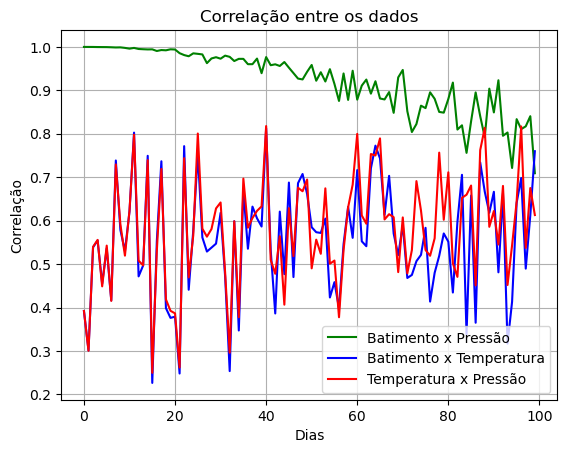

In [25]:
df_correlacao2 = pd.DataFrame()
n: int = 0
c_BATIMENTOxPRESSAO = []
c_BATIMENTOxTEMPERATURA = []
c_TEMPERATURAxPRESSAO  = []

int_corr_BATIMENTOxPRESSAO = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))
int_corr_BATIMENTOxTEMPERATURA = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))
int_corr_TEMPERATURAxPRESSAO = pd.DataFrame(columns = [classificacao_literal, valor_literal], index = range(0,99))

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):
    
    # Cálculo da correlação de cada pacote de dados
    correlacao = df[k:k+24].corr(method ='pearson')
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    classificador_correlacao(corr = correlacao[batimento_literal][2], index = n, corr_df = int_corr_BATIMENTOxPRESSAO)
    c_BATIMENTOxPRESSAO.append(correlacao[batimento_literal][2])
    

    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    classificador_correlacao(corr = correlacao[batimento_literal][3], index = n, corr_df = int_corr_BATIMENTOxTEMPERATURA)
    c_BATIMENTOxTEMPERATURA.append(correlacao[batimento_literal][3])
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    classificador_correlacao(corr = correlacao[temperatura_literal][2], index = n, corr_df = int_corr_TEMPERATURAxPRESSAO)
    c_TEMPERATURAxPRESSAO.append(correlacao[temperatura_literal][2])
    
    n = n + 1

df_correlacao2['Batimento x Pressão'] = c_BATIMENTOxPRESSAO
df_correlacao2['Batimento x Temperatura'] = c_BATIMENTOxTEMPERATURA
df_correlacao2['Temperatura x Pressão'] = c_TEMPERATURAxPRESSAO

print(df_correlacao2)

# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os dados")
plt.plot(c_BATIMENTOxPRESSAO, color = 'g', label = 'Batimento x Pressão')
plt.plot(c_BATIMENTOxTEMPERATURA, color = 'b', label = 'Batimento x Temperatura')
plt.plot(c_TEMPERATURAxPRESSAO, color = 'r', label = 'Temperatura x Pressão')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

Os resultados obtidos até aqui são suficientes para extrair conhecimento em relação a interação entre os sinais vitais. Porém, assim como foi feito na etapa anterior, normalizou-se os resultados, de acordo com as notas de aulas da professora Silvia Shimakura. Confira!

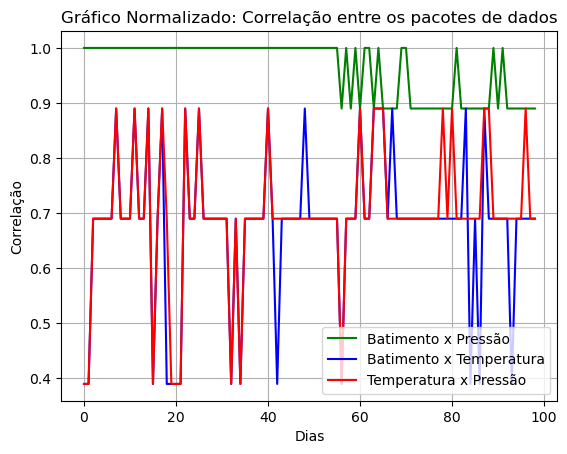

In [26]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Gráfico Normalizado: Correlação entre os pacotes de dados")
plt.plot(int_corr_BATIMENTOxPRESSAO['Valor'], color = 'g', label = 'Batimento x Pressão')
plt.plot(int_corr_BATIMENTOxTEMPERATURA['Valor'], color = 'b', label = 'Batimento x Temperatura')
plt.plot(int_corr_TEMPERATURAxPRESSAO['Valor'], color = 'r', label = 'Temperatura x Pressão')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

**Conclusão:**

Nesse sentido, considerando a representação gráfica anterior e a tabela das notas de aulas da professora Silvia Shimakura, conclui-se:

- **Correlação entre Batimento Cardíaco e Pressão Arterial**: Entre os dias 1 e 57, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte". Logo, é possível identificar um padrão de comportamento entre estes dois sinais vitais e, com isso, pode compor um padrão de aprendizado.
- **Correlação entre Batimento Cardíaco e Temperatura Corporal**: A correlação entre estes sinais, varia muito entre as classificações "Forte", "Moderado" e "Fraco". Isso leva a crer que existe, sim, um padrão, porém não é muito consistente.
- **Correlação entre Temperatura Coporal e Pressão Arterial**: A correlação entre estes sinais, também, varia muito entre as classificações "Forte", "Moderado" e "Fraco". Portanto, da mesma forma, pode-se dizer que existe um padrão, porém pouco estabelecido.

**4)** DIVIDA O ARQUIVO DE DADOS, PARA CADA PARÂMETRO, EM PACOTES COM 24 AMOSTRAS, CORRESPONDENDO A UM DIA DE AMOSTRAGEM. PARA CADA PACOTE AVALIADO, PODE-SE APLICAR FERRAMENTAL ESTATÍSTICO DESCRITIVO: MÉDIA, MEDIANA, MODA, DESVIO PADRÃO E HISTOGRAMA, PARA AUXILIAR NO PROCESSO DE MINERAÇÃO DE DADOS ? PARA CADA PACOTE, CALCULE: MÉDIA, MEDIANA, MODA E DESVIO PADRÃO, PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM ALARME DE EMERGÊNCIA. DESENVOLVER O SOFTWARE EM PYTHON.

Em primeir lugar, elaborou-se o script a seguir para calcular os indicadores da Estatística Descritiva dos sinais vitais (Batimento Cardíaco, Pressão Arterial, e Temperatura Corporal). Além disso, o script, também, tem a função de plotar os Histogramas destes sinais.

Estatística do Batimento Cardíaco
        Média  Primeiro Quartil    Mediana  Terceiro Quartil       Moda  \
0   71.356588         69.826352  72.000000         73.464102  70.694593   
1   71.332927         69.819982  71.969427         73.433709  66.519773   
2   71.309134         69.786045  71.943245         73.428555  66.529782   
3   71.266352         69.728343  71.921010         73.350559  66.402590   
4   71.261917         69.698796  71.929026         73.318464  66.491792   
..        ...               ...        ...               ...        ...   
95  68.803703         67.492724  69.332842         70.982529  64.710886   
96  69.516879         68.151566  69.728628         71.381792  64.638940   
97  68.909026         67.246843  69.016071         70.761605  61.771107   
98  68.635939         67.076154  69.090365         70.547058  61.812786   
99  68.632318         66.517264  68.715936         70.590233  65.339036   

    Desvio Padrão     Mínimo     Maximo  
0        2.415405  66.5

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

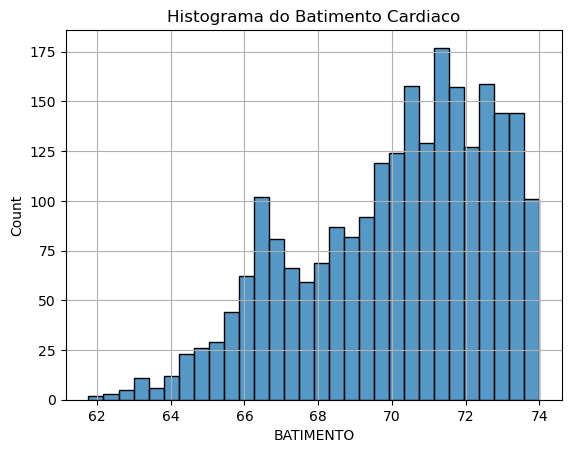

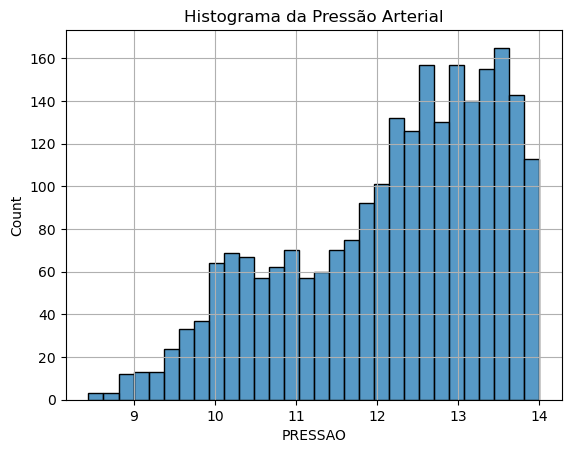

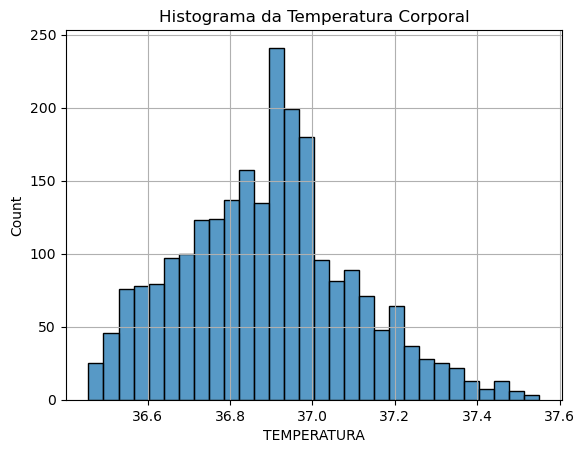

In [27]:
estatistica_Batimento = pd.DataFrame()
estatistica_Pressao = pd.DataFrame()
estatistica_Temperatura = pd.DataFrame()

media = np.zeros((100,3))
mediana = np.zeros((100,3))
moda = np.zeros((100,3))
desvio_padrao = np.zeros((100,3))
minimo = np.zeros((100,3))
maximo = np.zeros((100,3))
primeiro_quartil = np.zeros((100,3))
terceiro_quartil = np.zeros((100,3))


p: int = 0

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):

    # Cálculo da média, mediana, e devio padrão
    generic_statisticas = df[k:k+24].describe()

    media[p][0] = generic_statisticas[batimento_literal][1]
    media[p][1] = generic_statisticas[pressao_literal][1]
    media[p][2] = generic_statisticas[temperatura_literal][1]

    desvio_padrao[p][0] = generic_statisticas[batimento_literal][2]
    desvio_padrao[p][1] = generic_statisticas[pressao_literal][2]
    desvio_padrao[p][2] = generic_statisticas[temperatura_literal][2]

    minimo[p][0] = generic_statisticas[batimento_literal][3]
    minimo[p][1] = generic_statisticas[pressao_literal][3]
    minimo[p][2] = generic_statisticas[temperatura_literal][3]

    primeiro_quartil[p][0] = generic_statisticas[batimento_literal][4]
    primeiro_quartil[p][1] = generic_statisticas[pressao_literal][4]
    primeiro_quartil[p][2] = generic_statisticas[temperatura_literal][4]
    
    mediana[p][0] = generic_statisticas[batimento_literal][5]
    mediana[p][1] = generic_statisticas[pressao_literal][5]
    mediana[p][2] = generic_statisticas[temperatura_literal][5]

    terceiro_quartil[p][0] = generic_statisticas[batimento_literal][6]
    terceiro_quartil[p][1] = generic_statisticas[pressao_literal][6]
    terceiro_quartil[p][2] = generic_statisticas[temperatura_literal][6]

    maximo[p][0] = generic_statisticas[batimento_literal][7]
    maximo[p][1] = generic_statisticas[pressao_literal][7]
    maximo[p][2] = generic_statisticas[temperatura_literal][7]
    
    moda[p][0] = statistics.mode(df[batimento_literal][k:k+24])
    moda[p][1] = statistics.mode(df[pressao_literal][k:k+24])
    moda[p][2] = statistics.mode(df[temperatura_literal][k:k+24])
    
    p = p + 1
    
estatistica_Batimento[media_literal] = media[:,0]
estatistica_Batimento[primeiro_quartil_literal] = primeiro_quartil[:,0]
estatistica_Batimento[mediana_literal] = mediana[:,0]
estatistica_Batimento[terceiro_quartil_literal] = terceiro_quartil[:,0]
estatistica_Batimento[moda_literal] = moda[:,0]
estatistica_Batimento[desvio_padrao_literal] = desvio_padrao[:,0]
estatistica_Batimento[minimo_literal] = minimo[:,0]
estatistica_Batimento[maximo_literal] = maximo[:,0]

estatistica_Pressao[media_literal] = media[:,1]
estatistica_Pressao[primeiro_quartil_literal] = primeiro_quartil[:,1]
estatistica_Pressao[mediana_literal] = mediana[:,1]
estatistica_Pressao[terceiro_quartil_literal] = terceiro_quartil[:,1]
estatistica_Pressao[moda_literal] = moda[:,1]
estatistica_Pressao[desvio_padrao_literal] = desvio_padrao[:,1]
estatistica_Pressao[minimo_literal] = minimo[:,1]
estatistica_Pressao[maximo_literal] = maximo[:,1]

estatistica_Temperatura[media_literal] = media[:,2]
estatistica_Temperatura[primeiro_quartil_literal] = primeiro_quartil[:,2]
estatistica_Temperatura[mediana_literal] = mediana[:,2]
estatistica_Temperatura[terceiro_quartil_literal] = terceiro_quartil[:,2]
estatistica_Temperatura[moda_literal] = moda[:,2]
estatistica_Temperatura[desvio_padrao_literal] = desvio_padrao[:,2]
estatistica_Temperatura[minimo_literal] = minimo[:,2]
estatistica_Temperatura[maximo_literal] = maximo[:,2]

print("Estatística do Batimento Cardíaco")
print(estatistica_Batimento)
print("Estatística da Pressão Arterial")
print(estatistica_Pressao)
print("Estatística da Temperatura Corporal")
print(estatistica_Temperatura)

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data=df, x = temperatura_literal, bins = 30)

**Tomada de Decisão:** Para implementar um sistema de tomada de descisão, realizou-se a pesquisa a seguir.

**Batimento Cardíaco**:

Quando procurar atendimento de emergência?

Tanto acelerados quanto lentos, os batimentos cardíacos podem ser sinal de alterações graves no coração. Assim, demandam rapidez no atendimento.  

Considera-se batimento cardíaco acelerado quando a pessoa tem mais de 100 batimentos por minuto. Se for um episódio de início agudo e duradouro, associado ou não com sintomas como fraqueza, tontura, desmaios e falta de ar, a pessoa deve procurar atendimento médico de emergência. Se o episódio durar poucos minutos, deve marcar consulta com cardiologista.

É considerado batimento cardíaco lento quando a pessoa tem menos de 60 batimentos por minuto. Essa medição deve ser realizada através do pulso, aparelho de pressão arterial (esfigmomanômetro), oxímetro (aparelho que detecta nível de oxigênio e também batimentos) ou relógio de pulso com detecção de batimentos. Se for episódio de início agudo associado a tontura, fraqueza ou desmaios, deve-se procurar atendimento de emergência. Caso não apresente sintomas associados, deve-se marcar consulta com cardiologista para investigação.

**Referência:** Proven Cordis: Clínica Médica. O que é arritmia e quando se preocupar. Disponível em: <https://prevencordis.com.br/blog/arritmia/#:~:text=Considera%2Dse%20batimento%20card%C3%ADaco%20acelerado,procurar%20atendimento%20m%C3%A9dico%20de%20emerg%C3%AAncia.>. Acesso em: 12 de Abril de 2023;

**Pressão Arterial:**

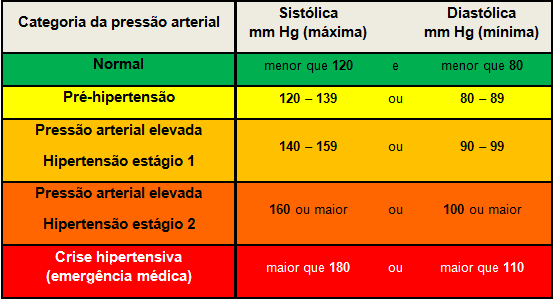

**Referência:** CISA: Centro de Informações sobre Saúde e Álcool. Hipertensão e uso excessivo de álcool. Disponível em: <https://cisa.org.br/sua-saude/informativos/artigo/item/64-hipertensao-e-uso-excessivo-de-alcool>. Acesso em: 12 de Abril de 2023;

**Temperatura Corporal:**

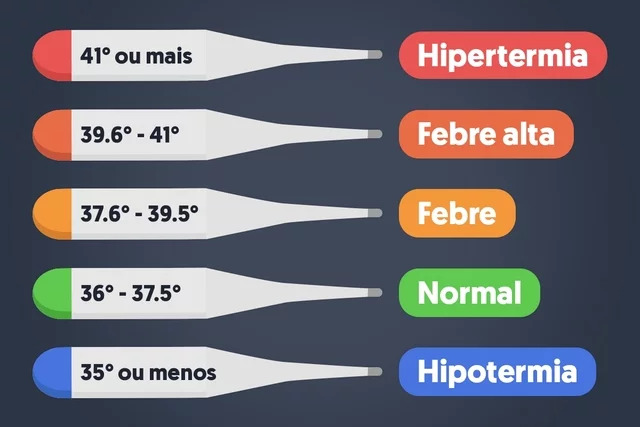

**Referência:** Express Remoções. Quantos Graus é Febre Alta? Como Medir a Temperatura. Disponível em: <https://www.expressremocoes.com.br/bem-estar/quantos-graus-e-febre-como-medir-a-temperatura/>. Acesso em: 12 de Abril de 2023;

Diante de todo o exposto, entende-se que, de acordo com a literatura, o diagnóstico de uma pessoa com base nos sinais vitais, enquanto ela estiver em repouso, deve seguir instruções vistas anteriormente.

Portanto, o script a seguir tem a finalidade de analisar os dados do arquivo "sinaisvitais003 100dias DV2 RAxxx4" após o tratamento, e realizar um diagnóstico de acordo com as instruções da pesquisa. 

In [28]:
diagnostico = pd.DataFrame()
d: list[str] = []
# Diagnóstico do Batimento Cardíaco
for m in estatistica_Batimento[media_literal]:
    
    if (m < 60): d.append("Preocupante: Batimento Cardíaco Lento.")
    elif ((m > 60) and (m < 100)): d.append("Normal.")
    else: d.append("Preocupante: Batimento Cardíaco Rápido.")

diagnostico[batimento_cardiaco_literal] = d

d.clear()

# Diagnóstico da Pressão Arterial
for m in estatistica_Pressao[media_literal]:
    
    if (m < 9): d.append("Pressão Baixa")
    elif ((m >= 9) and (m <= 12)): d.append("Normal")
    elif ((m > 12) and (m < 14)): d.append("Pré-Hipertensão")
    elif ((m >= 14) and (m < 16)): d.append("Hipertensão Estágio 1")
    elif ((m >= 16) and (m < 18)): d.append("Hipertensão Estágio 2")
    elif (m >= 18): d.append("Crise Hipertensiva")

diagnostico[pressao_arterial_literal] = d

d.clear()

# Diagnóstico da Temperatura Corporal
for m in estatistica_Temperatura[media_literal]:
    
    if (m < 35): d.append("Hipotermia")
    elif ((m > 35) and (m <= 37.7)): d.append("Normal")
    elif ((m > 37.7) and (m <= 39.5)): d.append("Febre")
    elif ((m > 39.5) and (m <= 41)): d.append("Febre Alta")
    elif (m > 41): d.append("Hipertemia")

diagnostico[temperatura_corporal_literal] = d

d.clear()

print("Monitoramento diário: \n")
print(diagnostico)

Monitoramento diário: 

   Batimento Cardíaco Pressão Arterial Temperatura Corporal
0             Normal.  Pré-Hipertensão               Normal
1             Normal.  Pré-Hipertensão               Normal
2             Normal.  Pré-Hipertensão               Normal
3             Normal.  Pré-Hipertensão               Normal
4             Normal.  Pré-Hipertensão               Normal
..                ...              ...                  ...
95            Normal.           Normal               Normal
96            Normal.           Normal               Normal
97            Normal.           Normal               Normal
98            Normal.           Normal               Normal
99            Normal.           Normal               Normal

[100 rows x 3 columns]


Por fim, este trabalho poderia abordar uma situação de monitoramento de um paciente a cada hora, pois há dados para isso. Porém, a questão pede para segmentar a base de dados em pacotes de 24 amostras, e isso resulta em 100 dias. Consequentemente, é possível obter um diagnóstico diário para tomada de decisão com base no resultado anterior como, por exemplo, realizar ações em um determinado dia para diminuir a pressão arterial quando estiver em "pré-hipertensão".

Além disso, pode-se fazer um diagnóstico após os 100 dias, e tomar uma decisão diferente. Por exemplo, recomendar alguns medicamentos para o paciente se tratar nos próximos dias. Nesse sentido, implementou-se o script a seguir.

In [29]:
print("Diagnóstico: \n")
print("Batimento Cardíaco: ", statistics.mode(diagnostico[batimento_cardiaco_literal]))
print("Pressão Arterial: ", statistics.mode(diagnostico[pressao_arterial_literal]))
print("Temperatura Corporal: ", statistics.mode(diagnostico[temperatura_corporal_literal]))

Diagnóstico: 

Batimento Cardíaco:  Normal.
Pressão Arterial:  Pré-Hipertensão
Temperatura Corporal:  Normal


**Conclusão:** As medidas dos sinais vitais foram coletadas de hora em hora, durante 100 dias. Com isso, baseado no valor médio destes indicadores em cada um dos dias, foi possível fazer um diagnóstico diário. Por fim, aplicou-se o conceito de moda nos 100 dias para concluir o diagnóstico e, por esta metodologia, obteve-se o resultado anterior.

**Apêndice:** Plotagem dos Sinais e dos Histogramas dos Dados antes da preparação.

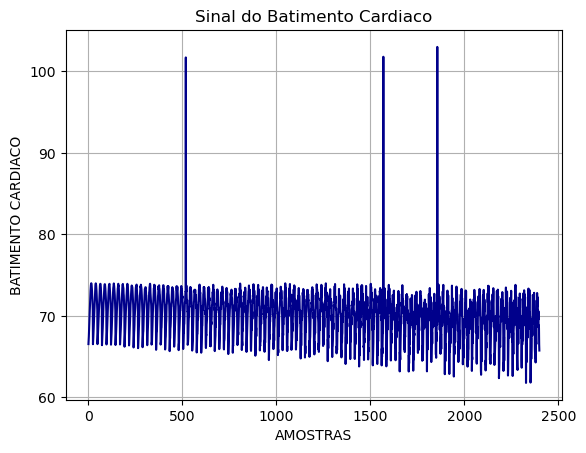

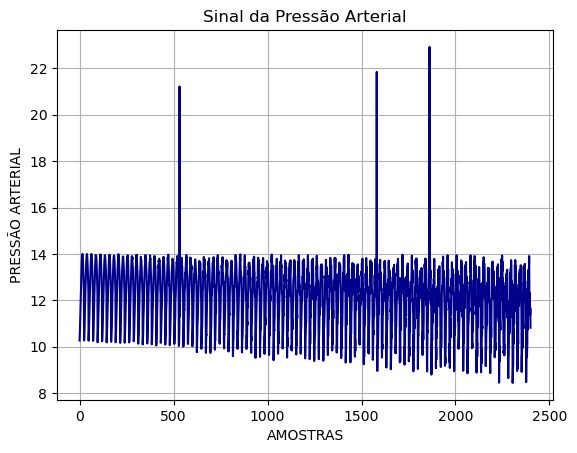

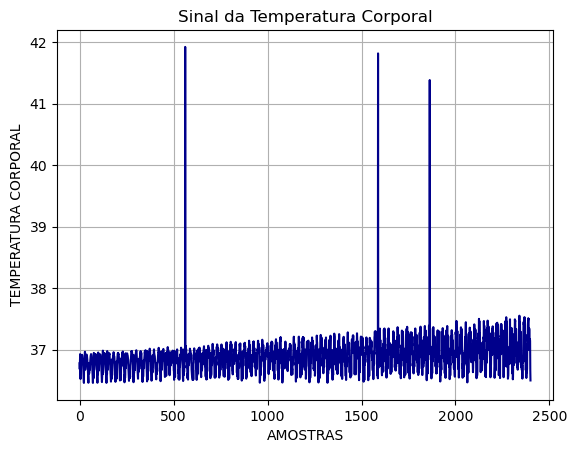

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

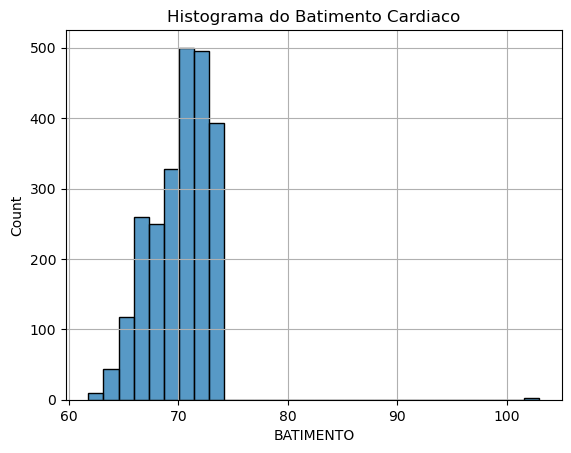

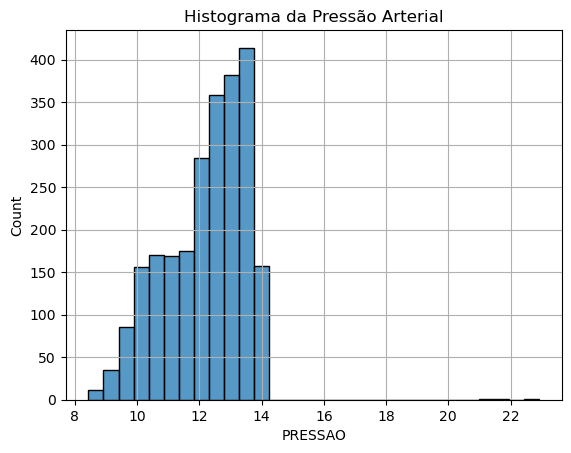

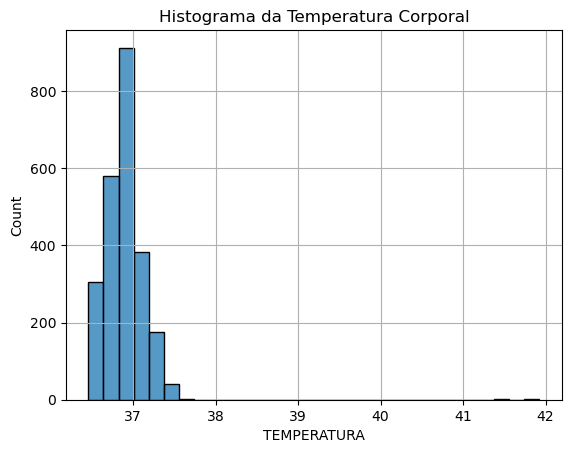

In [30]:
# Plotar o sinal do batimento cardíaco
plt.plot(df0[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df0[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df0[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df0, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df0, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data = df0, x = temperatura_literal, bins = 30)